## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
meta = pd.read_csv(mouse_metadata_path)
results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = meta.merge(results,on = 'Mouse ID')
# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duprow = data[data.duplicated(['Mouse ID','Timepoint'])]
duprow

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropindex = duprow.index
cdata = data.drop(dropindex,axis = 0)
cdata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cdata['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
taverage = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).mean()
tmedian = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).median()
tstd = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).std()
tvar = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).var()
tsem = data['Tumor Volume (mm3)'].groupby(cdata['Drug Regimen']).sem()

stats = pd.DataFrame({
    'Average' : taverage,
    'Median':tmedian,
    'Standard Deviation':tstd,
    'Variance':tvar,
    'Standard Error':tsem})
stats
# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Average,Median,Standard Deviation,Variance,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

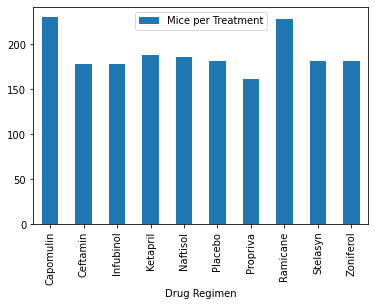

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
miceregime = pd.DataFrame(data["Mouse ID"].groupby(data['Drug Regimen']).count())
miceregime.rename(columns={"Mouse ID":"Mice per Treatment"}, inplace=True)
#mice_pertreat
miceregime.plot(kind="bar")

TypeError: only size-1 arrays can be converted to Python scalars

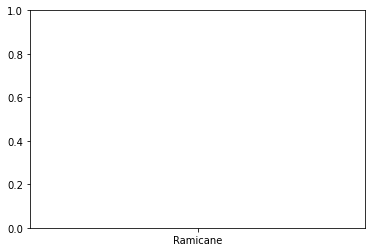

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = data['Drug Regimen'].unique()

plt.bar(x_axis, miceregime)


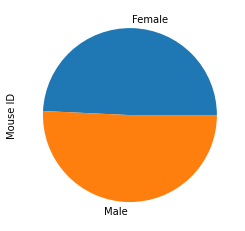

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = data['Mouse ID'].groupby(cdata['Sex']).count()
gender.plot.pie()

([<matplotlib.patches.Wedge at 0x1ea73734460>,
 [Text(0.02562299800632446, 1.099701533132135, ''),
  Text(-0.025623100967812958, -1.099701530733132, '')])

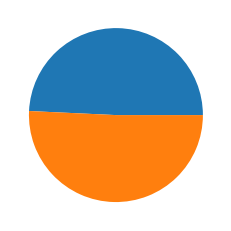

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = data['Mouse ID'].groupby(cdata['Sex']).count()
plt.pie(gender)

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap = data.loc[data['Drug Regimen']=="Capomulin"]
#len(capomulin["Mouse ID"].unique())
ram = data.loc[data['Drug Regimen']=="Ramicane"]
#len(ramicane["Mouse ID"].unique())
inf = data.loc[data['Drug Regimen']=="Infubinol"]
#len(infubinol["Mouse ID"].unique())
cef = data.loc[data['Drug Regimen']=="Ceftamin"]
#len(ceftamin["Mouse ID"].unique())

# Start by getting the last (greatest) timepoint for each mouse
# Start by getting the last (greatest) timepoint for each mouse
#For Capomulin
cap_max = cap.sort_values("Timepoint", ascending=False).reset_index(drop=True)
cap2 = cap_max.drop(cap_max.index[25:230])


#For Ramicane
ram_max = ram.sort_values("Timepoint", ascending=False).reset_index(drop=True)
ram2= ram_max.drop(ram_max.index[25:230])

#For Infubinol
inf_max = inf.sort_values("Timepoint", ascending=False).reset_index(drop=True)
inf2 = inf_max.drop(inf_max.index[25:230])

#For Ceftamin
cef_max = cef.sort_values("Timepoint", ascending=False).reset_index(drop=True)
cef2 = cef_max.drop(cef_max.index[25:230])




In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes    
# add subset 
# Create empty list to fill with tumor vol data (for plotting)
cap_vol = cap2["Tumor Volume (mm3)"]
rame_vol = ram2["Tumor Volume (mm3)"]
inf_vol = inf2["Tumor Volume (mm3)"]
cef_vol = cef2["Tumor Volume (mm3)"]


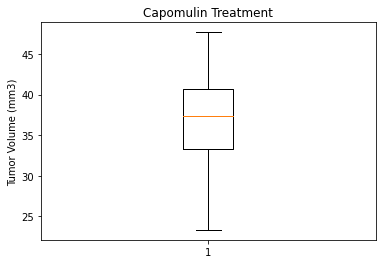

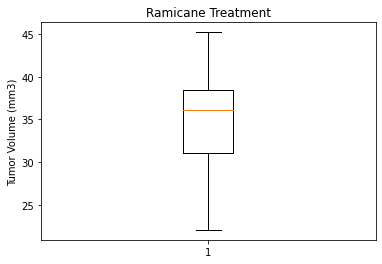

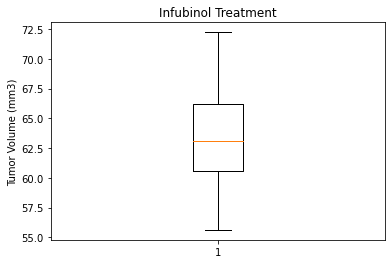

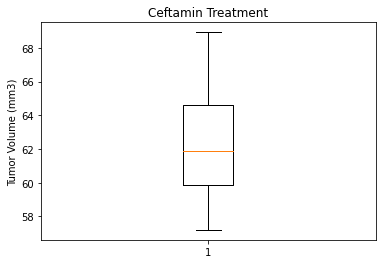

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cap_vol)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(rame_vol)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(inf_vol)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cef_vol)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Mouse s185 Tumor Volume (mm3)')

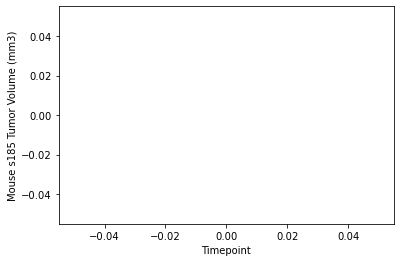

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulin
#Selected s187
s187 = cap.loc[cap['Mouse ID']=="s187"]
s187
time = s187["Timepoint"]
volume_s187 = s187['Tumor Volume (mm3)']
plt.scatter(time, volume_s187, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Timepoint")
plt.ylabel("Mouse s185 Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

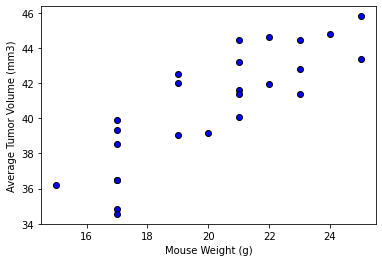

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = cap['Weight (g)'].groupby(data['Mouse ID']).mean()
avg_tumor = cap['Tumor Volume (mm3)'].groupby(data['Mouse ID']).mean()
plt.scatter(mouse_weight, avg_tumor, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'linregress' is not defined